<img src="https://devra.ai/analyst/notebook/3445/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Student Academic Performance Analysis Notebook</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

## Table of Contents

- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Discussion and Future Work](#Discussion-and-Future-Work)

## Introduction

This notebook examines a dataset of student academic performance. It is always interesting to see how various demographic and educational factors relate to exam outcomes. The dataset includes categorical information, such as gender and parental level of education, as well as three exam scores: math, reading, and writing. If you find these findings useful, please consider upvoting the notebook.

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Ensure agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is imported
%matplotlib inline

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [2]:
# Load the Students Academic Performance Dataset
data_path = '/kaggle/input/students-academic-performance-dataset/StudentsPerformance.csv'
df = pd.read_csv(data_path, encoding='ascii')

# Display the first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Cleaning and Preprocessing

Before analyzing the data, we check the basic characteristics of the dataset such as the data types and missing values. Note that while the dataset does not have an explicit date column, the non-numeric information is well-defined. It is always good practice to verify that the data is clean to prevent unexpected errors later.

In [3]:
# Check info, data types, and missing values
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
Missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing scor

## Exploratory Data Analysis

In this section, we explore various aspects of the dataset using multiple visualization techniques. Our dataset contains three numeric exam scores and several categorical variables. Although there are only three numeric columns, we still produce a pair plot for a better understanding of the distributions and relationships. We also include count plots and histograms to study the categorical distributions and score distributions respectively.

Note: When encountering errors in visualizations, ensuring that the DataFrame is properly subset (i.e., for numeric columns) is a common remedy.

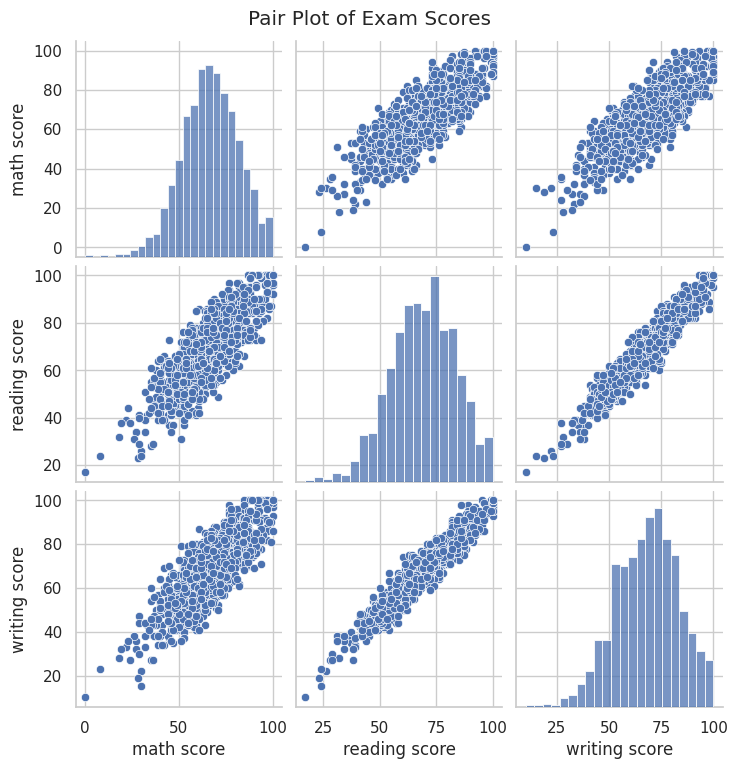

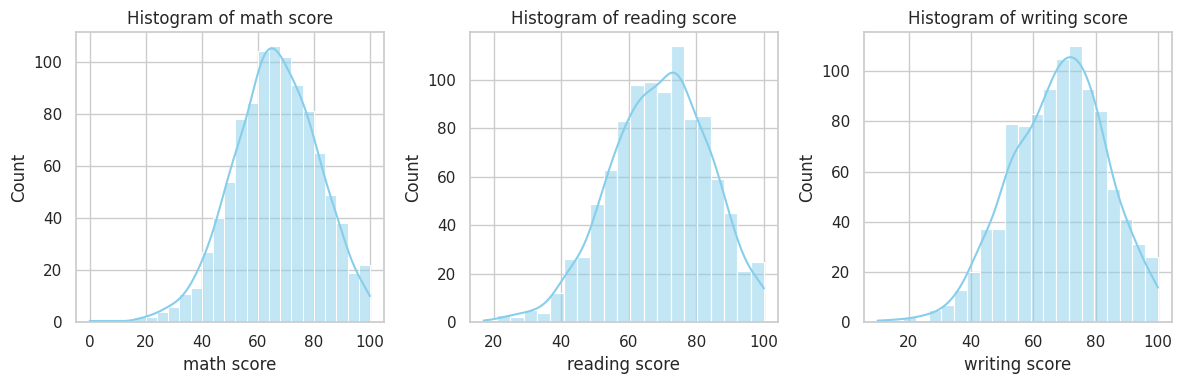

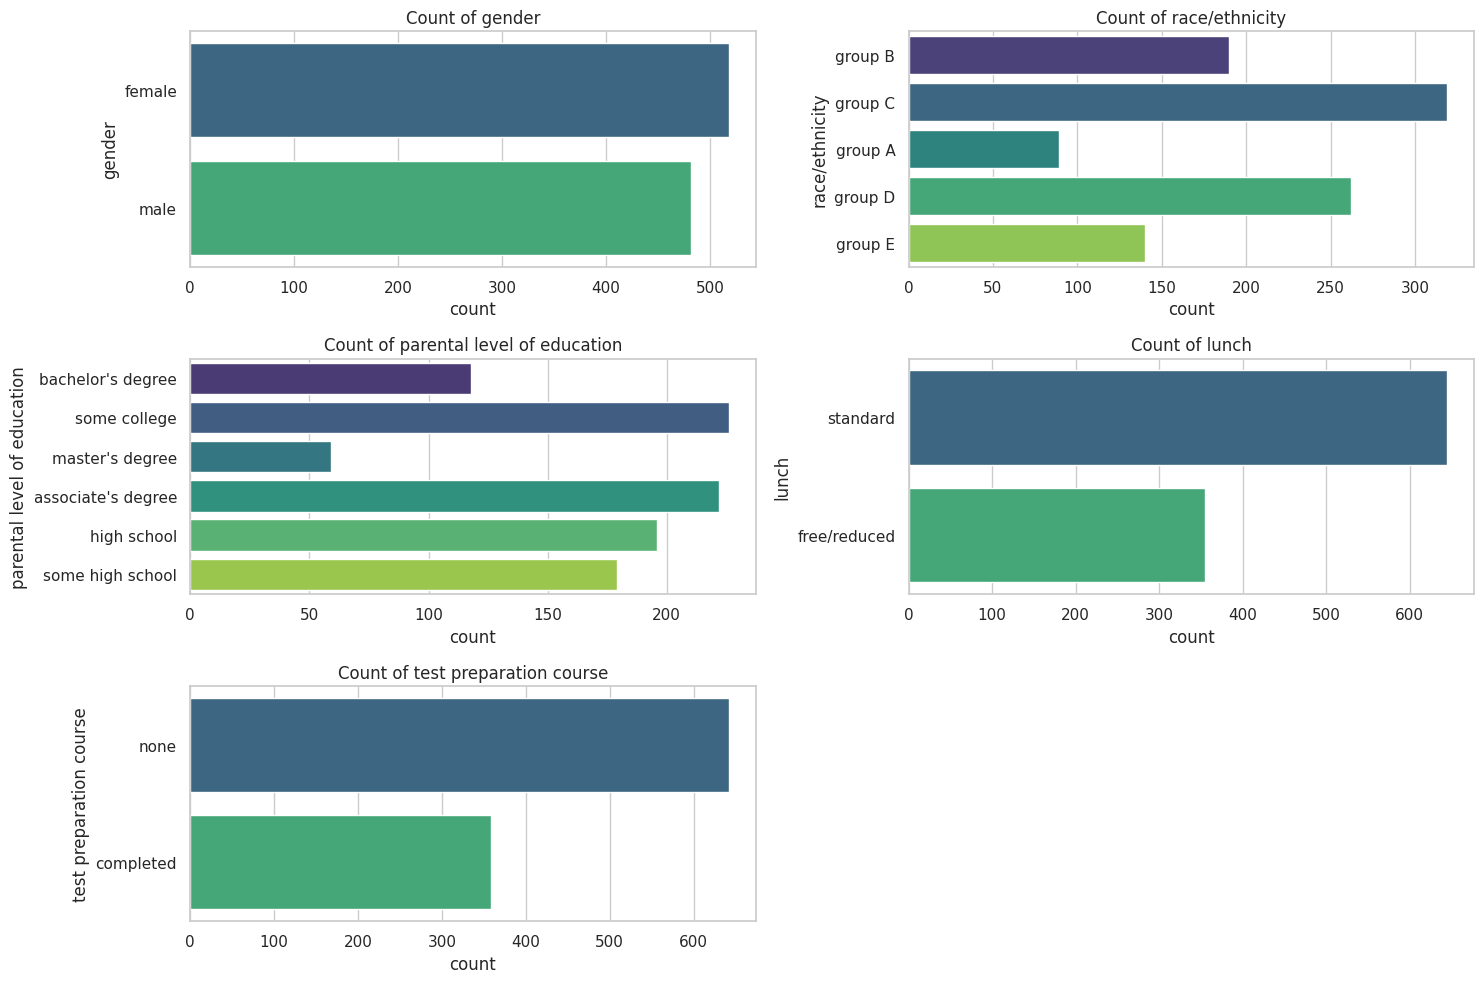

In [4]:
# Pair Plot for numeric columns
numeric_cols = ['math score', 'reading score', 'writing score']
sns.pairplot(df[numeric_cols])
plt.suptitle('Pair Plot of Exam Scores', y=1.02)
plt.show()

# Histogram for each exam score
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Count plot for categorical columns: gender, race/ethnicity, parental level of education, lunch, test preparation course
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=col, data=df, palette='viridis')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

## Predictive Modeling

Based on the data, it may be interesting to see if we can predict a student's math score using their reading and writing scores. While the correlation between these scores is expected, this exercise demonstrates a simple application of linear regression. The predictor's performance will be evaluated using the R² score.

R2 Score for predicting math score: 0.6826


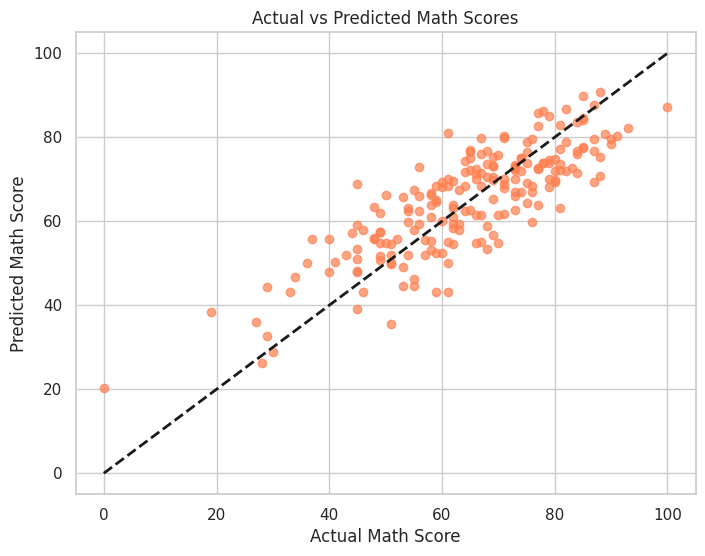

In [5]:
# Prepare features and target
X = df[['reading score', 'writing score']]
y = df['math score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R2 score as a measure of prediction accuracy
accuracy = r2_score(y_test, y_pred)
print(f"R2 Score for predicting math score: {accuracy:.4f}")

# A scatter plot to visualize the actual vs predicted math scores
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='coral')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

## Discussion and Future Work

In this notebook, we explored the Students Academic Performance dataset through multiple facets including data cleaning, preprocessing, and exploratory analysis. We built a predictor for math scores using reading and writing scores via linear regression, achieving a certain R² score. 

Merits of this approach include the use of varied visualization methods to gain insight into both categorical and continuous variables and applying a simple yet effective predictive model. Future work could include exploring additional predictors such as demographic factors, trying more complex machine learning models, or investigating potential interactions between different categorical features.

The methods used here, including careful data subsetting and comprehensive visualizations, are useful techniques that can mitigate common errors encountered with diverse datasets. Keep exploring, and if you found this analysis helpful, please consider upvoting it.